This data analysis project examines the Twitter Customer Service dataset to uncover patterns and relationships. The goal is to provide insights that help businesses make better decisions and enhance customer service and user experience.

<span style="font-family: Arial; font-size: 25px; font-weight: bold;">Week 1: Data Preprocessing</span>

<span style="font-family: Arial;font-weight: bold;">Step one: </span> Import Data into Jupyter Notebook using python

Successfully loaded dataset into Jupyter Notebook and set up pandas, matplotlib, and seaborn for analysis. 

In [1]:
import sys
sys.executable

'/Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12'

In [2]:
!pip3 install pandas


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("/Users/kekening/Downloads/twcs (1).csv")

<span style="font-family: Arial; font-weight: bold;"> Step two: </span> Obtain general information about the dataset

Get some basic idea about what the dataset looks like, what does the column means. 

In [5]:
# Data Quality Check
print("Data Quality Check:")

print("DataFrame Info:")
df.info()

Data Quality Check:
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [6]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,tweet_id,in_response_to_tweet_id
count,2.811774e+06,2.017439e+06
mean,1.504565e+06,1.463141e+06
std,8.616450e+05,8.665730e+05
min,1.000000e+00,1.000000e+00
25%,7.601652e+05,7.155105e+05
50%,1.507772e+06,1.439805e+06
75%,2.253296e+06,2.220646e+06
max,2.987950e+06,2.987950e+06


<div style="background-color: #e6ffe6; padding: 10px;">

By using .describe() method, we are able to tell that we are dealing with large dataset. The count for tweet id is about 2.81 millions and response tweet count is about 2.02 millions.

</div>

In [7]:
print("\nFirst few rows of the DataFrame:")
df.head()


First few rows of the DataFrame:


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


<span style="font-family: Arial; font-weight: bold;"> Step three: </span> Data Preprocessing
Check missing values, duplicates, and outliers. 

In [8]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())


tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64
0


In [9]:
# Fill missing values with zero
df['response_tweet_id'] = df['response_tweet_id'].fillna(0)
df['in_response_to_tweet_id'] = df['in_response_to_tweet_id'].fillna(0)

print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values after cleaning:
tweet_id                   0
author_id                  0
inbound                    0
created_at                 0
text                       0
response_tweet_id          0
in_response_to_tweet_id    0
dtype: int64


<span style="font-family: Arial; font-size: 25px; font-weight: bold;">Week 2-3: Conduct Exploratory Data Analysis & Data Cleaning</span>

The dataset has been reorganized by time-based grouping, and a standard deviation has been computed with time converted to nanoseconds to eliminate outliers. Exploratory Data Analysis (EDA) is also conducted this week to find interesting trends/pattern about what the data is trying to tell us. 

By setting up EDA questions we are able to find some interesting trends: 

1) There is more 'Inbound' than 'Outbound' Response, meaning that there are more question that's been ask but didn't have a cooresponding  answer. This result is within expectation since some tweets might not be questions, could just be promotions, lost connection, or other issues.
2) There are about 2.8 millions of tweets within the year of 2017, and the top 20 users are customer service from big industry companies.
3) The busiest Twitter user in 2017 posted around 1300 tweets.
4) There's a significant increase in the number of customer support tweets received from October to December 2017.  

In [10]:
# Reagrange data by time-grouping

# Convert 'response_tweet_id' and 'in_response_to_tweet_id' to numeric type int64
df['response_tweet_id'] = pd.to_numeric(df['response_tweet_id'], errors='coerce', downcast='integer')
df['in_response_to_tweet_id'] = pd.to_numeric(df['in_response_to_tweet_id'], errors='coerce', downcast='integer')

# Convert 'created_at' to datetime with explicit format
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

# Convert 'created_at' to Unix timestamps (nano sec)
df['created_at'] = df['created_at'].astype(int)  

# Calculate the first quartile (Q1)
Q1 = df['created_at'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['created_at'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['created_at'] < lower_bound) | (df['created_at'] > upper_bound)]

# Print the outliers 
print("\nOutliers in 'created_at' column:")
print(outliers)

# Remove outliers
df_no_outliers = df[(df['created_at'] >= lower_bound) & (df['created_at'] <= upper_bound)]


Outliers in 'created_at' column:
         tweet_id     author_id  inbound           created_at  \
255           348        115798     True  1314588005000000000   
315           609         Delta    False  1470447843000000000   
317           611        115818     True  1470447110000000000   
4546         6609         Delta    False  1502232306000000000   
4547         6610        117166     True  1502232368000000000   
...           ...           ...      ...                  ...   
2808501   2984741       AskLyft    False  1487361617000000000   
2810222   2986427       AskCiti    False  1502974803000000000   
2810224   2986429        503274     True  1502950555000000000   
2811464   2987646  SouthwestAir    False  1503098192000000000   
2811466   2987648        823773     True  1503096251000000000   

                                                      text  response_tweet_id  \
255      Lost your booking number? No worries, just dro...                NaN   
315      @115818 Glad t

<span style="font-family: Arial; font-weight: bold;"> EDA Question 1: </span> How many are inbound and outbound responses in the dataset?

In [11]:
# Count the number of inbound and outbound responses
response_counts = df['inbound'].value_counts()

# Print the counts
print("Number of Inbound Responses:", response_counts[True])
print("Number of Outbound Responses:", response_counts[False])


Number of Inbound Responses: 1537843
Number of Outbound Responses: 1273931


<div style="background-color: #e6ffe6; padding: 10px;">
Answer: ~1.5 millions for Inbound response and ~1.2 millions for Outbound Response. 
By this data we can tell that there are about 0.3 millions of tweets that didn't get a reply or a support back. 

</div>

<span style="font-family: Arial; font-weight: bold;"> EDA Question 2: </span> How many unique tweets are there and top 20 Twitter User? 

In [12]:
# Number of unique tweets
unique_tweets = df['tweet_id'].nunique()
print("Number of Unique Tweets:", unique_tweets)

Number of Unique Tweets: 2811774


In [13]:
# Top 20 Twitter users
top_20_users = df['author_id'].value_counts().head(20)
print("\nTop 20 Twitter Users:")
print(top_20_users)


Top 20 Twitter Users:
author_id
AmazonHelp         169840
AppleSupport       106860
Uber_Support        56270
SpotifyCares        43265
Delta               42253
Tesco               38573
AmericanAir         36764
TMobileHelp         34317
comcastcares        33031
British_Airways     29361
SouthwestAir        28977
VirginTrains        27817
Ask_Spectrum        25860
XboxSupport         24557
sprintcare          22381
hulu_support        21872
sainsburys          19466
GWRHelp             19364
AskPlayStation      19098
ChipotleTweets      18749
Name: count, dtype: int64


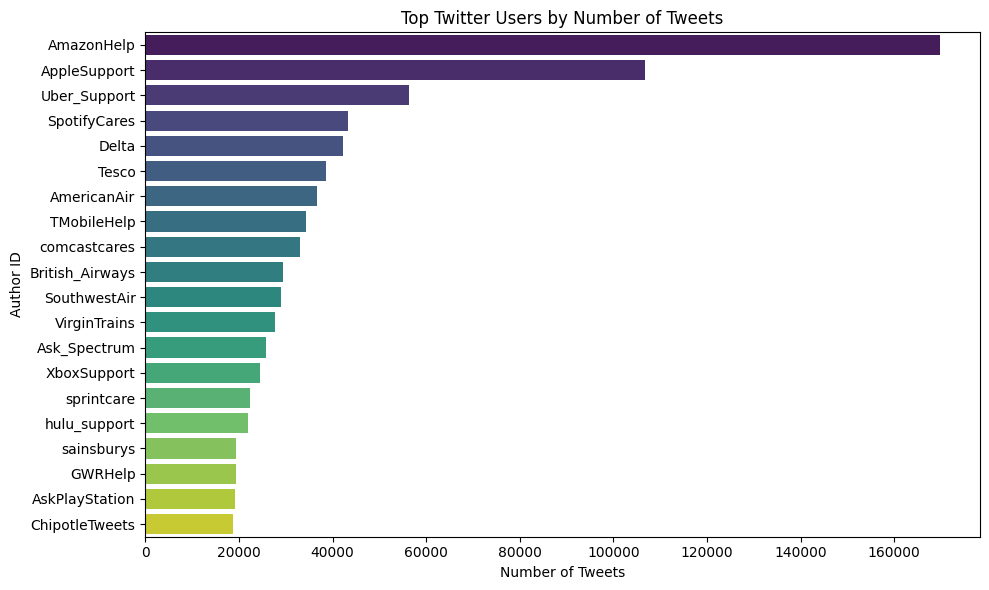

In [14]:
# Count the number of tweets per author
tweet_counts = df['author_id'].value_counts().head(20)

# Visualize the top Twitter users by number of tweets
plt.figure(figsize=(10, 6))
sns.barplot(x=tweet_counts.values, y=tweet_counts.index, palette='viridis', hue=tweet_counts.index, legend=False)
plt.title('Top Twitter Users by Number of Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('Author ID')
plt.tight_layout()
plt.show()

<div style="background-color: #e6ffe6; padding: 10px;">
Answer: There are about 2.8 millions of unique tweets, and the top 20 users are 'AmazonHelp', 'AppleSupport', 'Uber_support', 'SpotifyCares', 'Delta',... mostly large companys from various industry. 

</div>

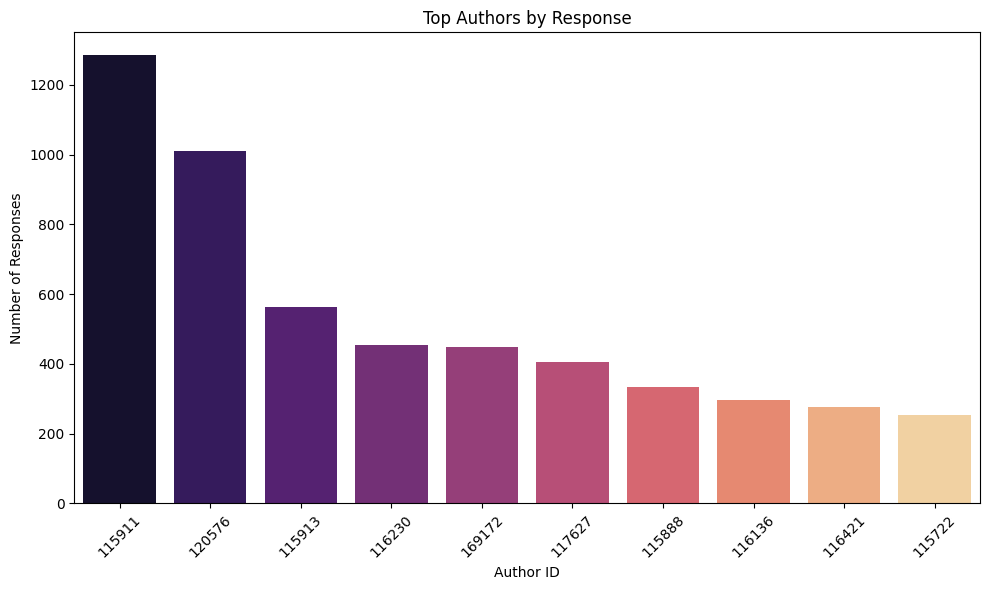

In [15]:
# Count the number of responses per author
response_counts = df[df['inbound']]['author_id'].value_counts().head(10)

# Visualize the top authors by response
plt.figure(figsize=(10, 6))
sns.barplot(x=response_counts.index, y=response_counts.values, palette='magma', hue=response_counts.index, legend=False)
plt.title('Top Authors by Response')
plt.xlabel('Author ID')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Those are the top twitter users with the most questions and response. 

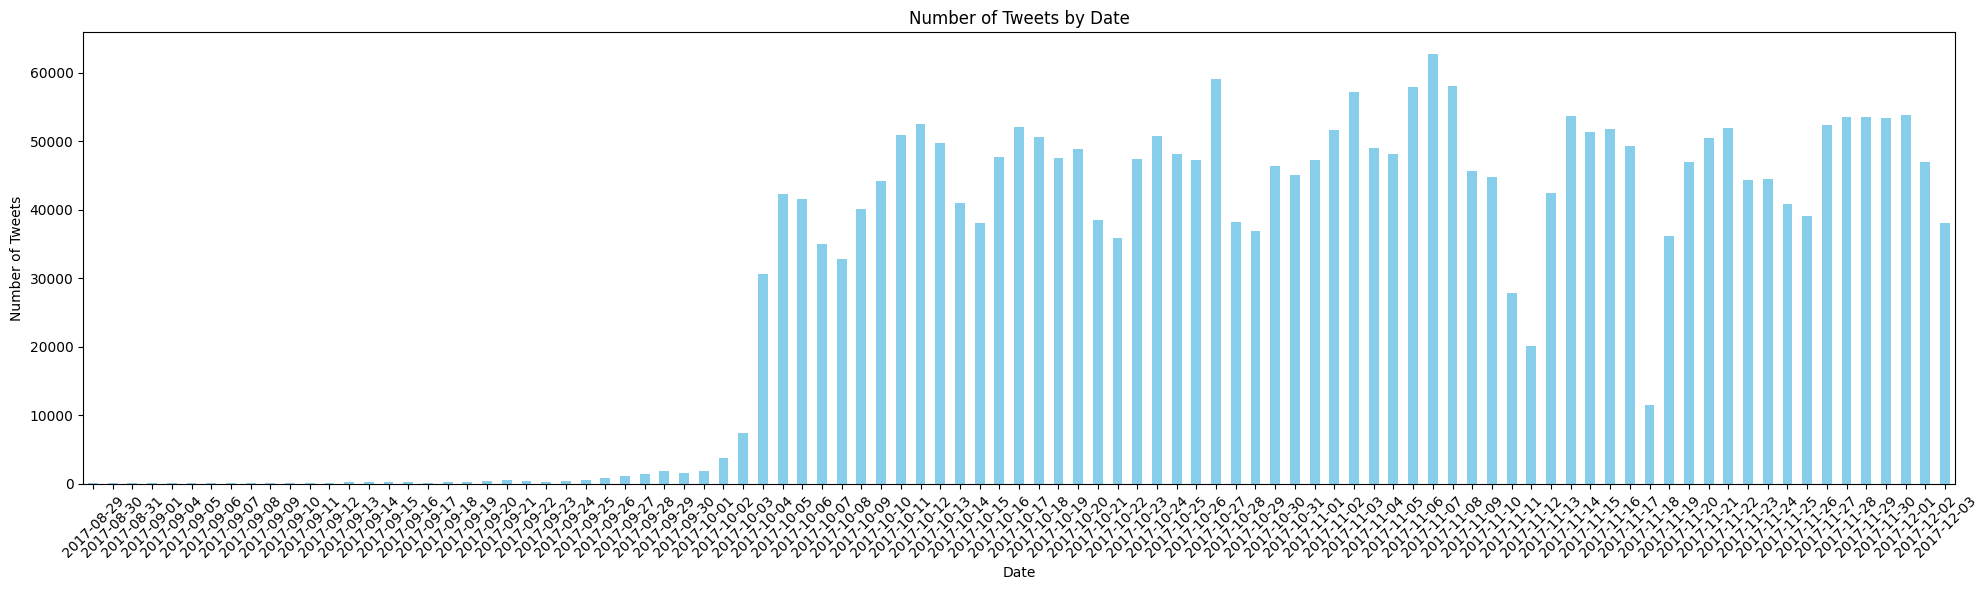

In [16]:
# Convert 'created_at' column to datetime format
df['created_at'] = pd.to_datetime(df['created_at']) # , format='%a %b %d %H:%M:%S +0000 %Y')

# Extract date from the 'created_at' column
df['date'] = df['created_at'].dt.date

# Count the number of tweets by date
tweets_by_date = df['date'].value_counts().sort_index()
tweets_by_date = tweets_by_date[tweets_by_date >= 100] #lower limit

# Plot the number of tweets by date
plt.figure(figsize=(20, 6))
tweets_by_date.plot(kind='bar', color='skyblue')
plt.title('Number of Tweets by Date')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We have seen that the dataset seems to form a negative skewed curve starting from Ocotber 2017.

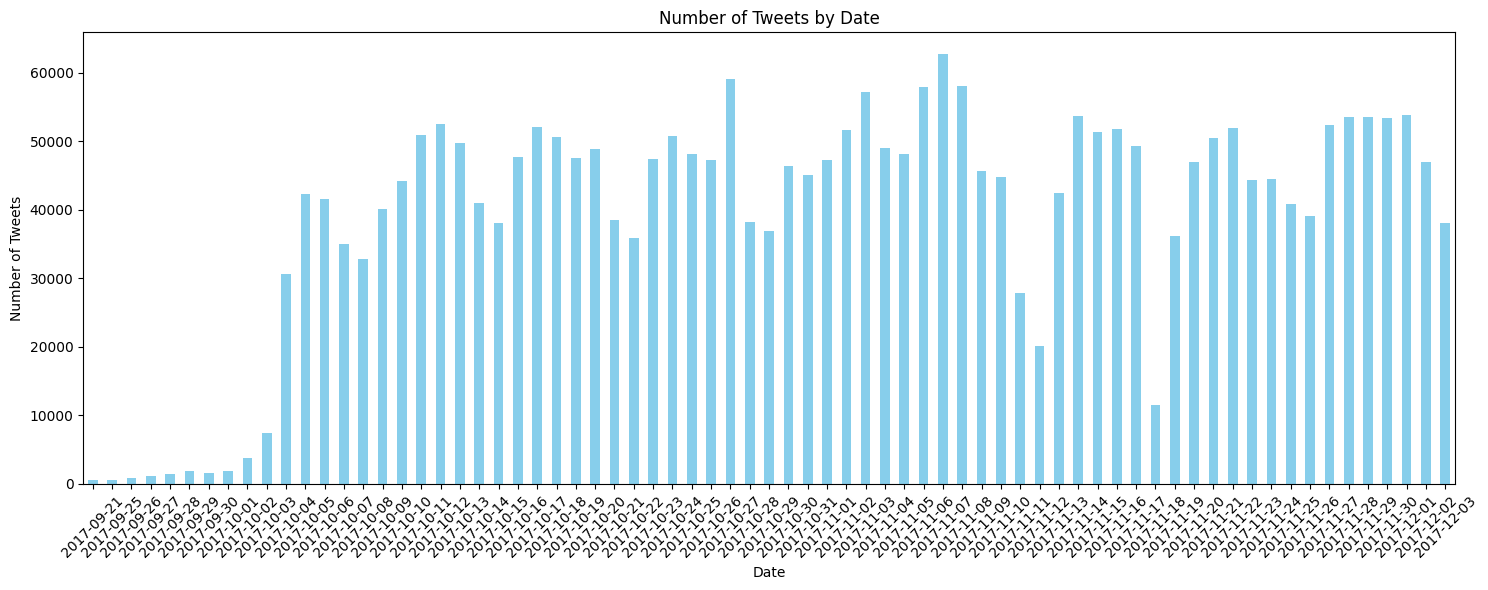

In [17]:
# Convert 'created_at' column to datetime format
df['created_at'] = pd.to_datetime(df['created_at']) # , format='%a %b %d %H:%M:%S +0000 %Y')

# Extract date from the 'created_at' column
df['date'] = df['created_at'].dt.date

# Count the number of tweets by date
tweets_by_date = df['date'].value_counts().sort_index()
tweets_by_date = tweets_by_date[tweets_by_date >= 500] #lower limit

# Plot the number of tweets by date
plt.figure(figsize=(15, 6))
tweets_by_date.plot(kind='bar', color='skyblue')
plt.title('Number of Tweets by Date')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div style="background-color: #e6ffe6; padding: 10px;">
After implementing a restriction of at least 500 tweets per date, we discovered a nearly exponential increase in tweet volume from October through December 2017. With domain knowledge, we can speculate that this trend may be related to President Donald Trump's Twitter activities regarding political controversy and the impact of social media on governance. Additionally, Twitter's suspension of approximately 58 million user accounts could also contribute to this phenomenon. 
</div>

<span style="font-family: Arial; font-size: 25px; font-weight: bold;">Week 4: Data Cleaning (Text Cleaning)</span>

Keep cleaning the data, focusing on text cleanup to extract valuable insights from the text content.

In [18]:
# Text Cleaning Formate
df = df[['text']]
print('shape is:', df.shape)
df.head()

shape is: (2811774, 1)


,text
0,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...
4,@sprintcare I did.


In [19]:
# Text lowercase 
df['text_lower'] = df.loc[:,'text'].str.lower()
df.head(10)

,text,text_lower
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...
4,@sprintcare I did.,@sprintcare i did.
5,@115712 Can you please send us a private messa...,@115712 can you please send us a private messa...
6,@sprintcare is the worst customer service,@sprintcare is the worst customer service
7,@115713 This is saddening to hear. Please shoo...,@115713 this is saddening to hear. please shoo...
8,@sprintcare You gonna magically change your co...,@sprintcare you gonna magically change your co...
9,@115713 We understand your concerns and we'd l...,@115713 we understand your concerns and we'd l...


In [20]:
# Punctuations remove
import string
punctuations = string.punctuation
print(punctuations)

%timeit  
def remove_punctuations(text):
    return text.translate(str.maketrans('','',punctuations))

df['text_wo_punct'] = df['text_lower'].apply(lambda text: remove_punctuations(text))
df.head(10)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,text,text_lower,text_wo_punct
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did
5,@115712 Can you please send us a private messa...,@115712 can you please send us a private messa...,115712 can you please send us a private messag...
6,@sprintcare is the worst customer service,@sprintcare is the worst customer service,sprintcare is the worst customer service
7,@115713 This is saddening to hear. Please shoo...,@115713 this is saddening to hear. please shoo...,115713 this is saddening to hear please shoot ...
8,@sprintcare You gonna magically change your co...,@sprintcare you gonna magically change your co...,sprintcare you gonna magically change your con...
9,@115713 We understand your concerns and we'd l...,@115713 we understand your concerns and we'd l...,115713 we understand your concerns and wed lik...


In [21]:
# Removal of Frequent words
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [22]:
nltk.download('stopwords')
# Natural Language Toolkit (NLTK)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kekening/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
', '.join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [24]:
stopwords_set = set(stopwords.words('english'))
def remove_stopwords(text):
        return ' '.join(words for words in str(text).split() if words not in stopwords_set)
    # Tokenize each words in string text, and check for non-stopwords
df['text_wo_stop'] = df['text_wo_punct'].apply(lambda text: remove_stopwords(text))
df.head()

,text,text_lower,text_wo_punct,text_wo_stop
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare


In [25]:
from collections import Counter
cnt = Counter()
# count occurrence of element

for text in df['text_wo_stop'].values:
    for word in text.split():
        cnt[word] +=1
        # for each text in list, count occurrence of  of word

cnt.most_common(10)


[('us', 451262),
 ('please', 402709),
 ('dm', 335374),
 ('help', 267633),
 ('hi', 224603),
 ('thanks', 206452),
 ('get', 200374),
 ('sorry', 192246),
 ('like', 146385),
 ('know', 145407)]

In [26]:
freq_words = set([w for (w,wc) in cnt.most_common(10)])
# Don't quite understand, something to do with tuple?

def remove_freqwords(text):
    return ' '.join(word for word in str(text).split() if word not in freq_words)

df['text_wo_freq'] = df['text_wo_stop'].apply(lambda text:remove_freqwords(text))
df.head()

,text,text_lower,text_wo_punct,text_wo_stop,text_wo_freq
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare


In [27]:
# Removal of Rare words
n_rare_words = 10
rare_words = set([w for (w,c) in cnt.most_common()][:- n_rare_words: -1])
print(rare_words)

def remove_rarewords(text):
    return ' '.join(word for word in str(text).split() if word not in rare_words)

df['text_wo_freqrare'] = df['text_wo_freq'].apply(lambda text:remove_rarewords(text))
df.head()

{'823868', 'httpstco7uqpwyh1b6', 'httpstcov2tmhetl7q', '823869', '823867', 'httpstco4v1ft0th5x', 'notjustxmasallyearround', 'httpstcogfyuq1kjtk', '823870'}


,text,text_lower,text_wo_punct,text_wo_stop,text_wo_freq,text_wo_freqrare
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare,sprintcare


In [28]:
# Ignore numbers
def ignore_numbers(text):
    words = []
    for word in text.split():
        if not any(char.isdigit() for char in word):
            words.append(word)
    return ' '.join(words)

df['text_wo_numbers'] = df['text_wo_freqrare'].apply(ignore_numbers)
df.head()
 

,text,text_lower,text_wo_punct,text_wo_stop,text_wo_freq,text_wo_freqrare,text_wo_numbers
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,understand would assist would need private sec...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...,send private message assist click ‘message’ to...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare,sprintcare,sprintcare


<span style="font-family: Arial; font-size: 25px;font-weight: bold;"> Week 5: Data Analysis </span>

Main goal: To improve customer service and user experience, assit business decision making by analyses Twitter Customer Support dataset. 

EDA result: We found some intresting trend by exploring a little more into the dataset. And I decide to focus those two findings: 
- "There are about 2.8 millions of tweets within the year of 2017, and the top 20 users are customer service from big industry companies."
- "There's a significant increase in the number of customer support tweets received from October to December 2017."

As we explored the data further, we made some interesting discoveries. In 2017, there were roughly 2.8 million tweets recorded. Notably, among the top 20 contributors to this tweet volume were customer service accounts associated with major industry players such as Apple and Amazon. Additionally, we observed a significant uptick in customer support-related tweets during the final quarter of 2017, particularly from October to December.

Prediction/Suspection why the EDA results appear to like that: 
1) The reason why Amazon has more tweets than Apple could be because Amazon sells a lot of different things online, while Apple is also popular because of its well-known brand and good customer service.
2) The large volume of tweets was caused by the 2017 Donald Trump Twitter Activity on political topics and controverst topics.

Since our goal is to improve customer service, we will pick the trend of Apple and Amazon with most customer support tweets in order to define what is a good customer service and why does Amazon gets more tweets compare to Apple? 

Domain Question: Is there a correlations between tweet volume and factors such as product variety, online presence, and customer service quality for Apple and Amazon? 

- Product Variety: Utilize keywords related to Amazon and Apple products to compare tweet volumes, assessing which company generates more discussion about its offerings.
- Online presence: Analyze the "inbound" column to gauge engagement with the company's official account, providing insights into its online presence and interaction with users.
- Customer service quality: Identify instances of customer gratitude or expressions of thanks within tweets to infer satisfaction levels and indirectly measure the quality of customer service provided by the companies.

<span style="font-family: Arial; font-weight: bold;"> Product Variety Analysis </span>

Amazon Tweet Count: 15715
Apple Tweet Count: 68152


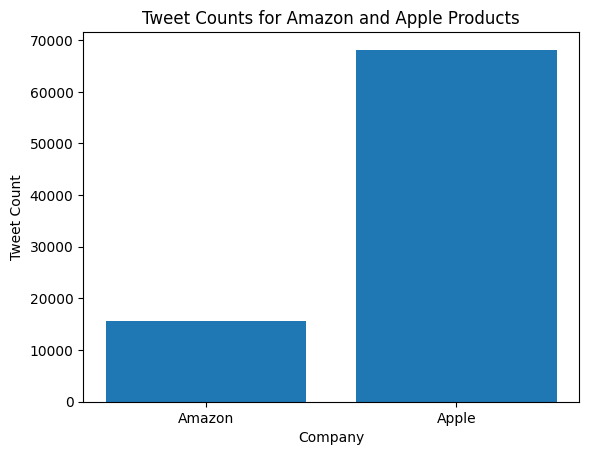

In [29]:
amazon_keywords = ['Sales','Echo', 'Kindle', 'Fire Tablet', 'Fire TV', 'Amazon Basics', 'Amazon Prime', 'Amazon Fresh', 'Amazon Music', 'Amazon Video']
apple_keywords = ['Sales','iPhone', 'iPad', 'MacBook', 'Apple Watch', 'AirPods', 'iMac', 'Mac Mini', 'Apple TV', 'HomePod']

# customer_service_keywords = ['customer service', 'support', 'help', 'assistance', 'refund', 'return', 'exchange', 'complaint', 'issue', 'problem-solving']

amazon_tweets = df[df['text_wo_numbers'].str.contains('|'.join(amazon_keywords), case=False)]
apple_tweets = df[df['text_wo_numbers'].str.contains('|'.join(apple_keywords), case=False)]

amazon_tweet_count = len(amazon_tweets)
apple_tweet_count = len(apple_tweets)

print("Amazon Tweet Count:", amazon_tweet_count)
print("Apple Tweet Count:", apple_tweet_count)

plt.bar(['Amazon', 'Apple'], [amazon_tweet_count, apple_tweet_count])
plt.xlabel('Company')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts for Amazon and Apple Products')
plt.show()


<div style="background-color: #e6ffe6; padding: 10px;">
Amazon Tweet Count: 10655
Apple Tweet Count: 63230
By searching keywords for both Apple products and Amazon products we found out that Apple actually have more tweet volumes for Product Variety compare to Amazon.

</div>

<span style="font-family: Arial; font-weight: bold;"> Online Presence Analysis </span>

In [30]:
amazon_tweets = df_no_outliers[(df_no_outliers['author_id'] == 'AmazonHelp') & (df_no_outliers['inbound'] == False)]
apple_tweets = df_no_outliers[(df_no_outliers['author_id'] == 'AppleSupport') & (df_no_outliers['inbound'] == False)]

# Convert 'created_at' column to datetime
df_no_outliers['created_at'] = pd.to_datetime(df_no_outliers['created_at'])

# Calculate response time for AmazonHelp
amazon_tweets['created_at'] = pd.to_datetime(amazon_tweets['created_at'])
amazon_tweets['in_response_to_tweet_id'] = pd.to_numeric(amazon_tweets['in_response_to_tweet_id'], errors='coerce')
amazon_tweets = amazon_tweets.sort_values(by=['created_at'])
amazon_tweets['response_time'] = amazon_tweets.groupby('in_response_to_tweet_id')['created_at'].diff()

apple_tweets['created_at'] = pd.to_datetime(apple_tweets['created_at'])
apple_tweets['in_response_to_tweet_id'] = pd.to_numeric(apple_tweets['in_response_to_tweet_id'], errors='coerce')
apple_tweets = apple_tweets.sort_values(by=['created_at'])
apple_tweets['response_time'] = apple_tweets.groupby('in_response_to_tweet_id')['created_at'].diff()

# Aggregate response times (e.g., mean)
amazon_mean_response_time = amazon_tweets['response_time'].mean()
apple_mean_response_time = apple_tweets['response_time'].mean()

# Convert mean response times to more readable format
amazon_mean_response_time_readable = str(amazon_mean_response_time).split()[-1]
apple_mean_response_time_readable = str(apple_mean_response_time).split()[-1]

print("AmazonHelp Mean Response Time:", amazon_mean_response_time_readable)
print("Apple Support Mean Response Time:", apple_mean_response_time_readable)
# ch has an average of 12 hours 49 minutes, AmazonHelp is faster.

AmazonHelp Mean Response Time: 00:34:08.223249027
Apple Support Mean Response Time: 12:49:12.968750


/var/folders/z4/nqbbpnv52gddff6vt_dtcgvm0000gn/T/ipykernel_2376/277973307.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_tweets['created_at'] = pd.to_datetime(amazon_tweets['created_at'])
/var/folders/z4/nqbbpnv52gddff6vt_dtcgvm0000gn/T/ipykernel_2376/277973307.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_tweets['in_response_to_tweet_id'] = pd.to_numeric(amazon_tweets['in_response_to_tweet_id'], errors='coerce')
/var/folders/z4/nqbbpnv52gddff6vt_dtcgvm0000gn/T/ipykernel_2376/277973

<div style="background-color: #e6ffe6; padding: 10px;">
By analyse average respond time for both Amazon and Apple, we found out that Amazon takes about on average 34 minutes to response, wherelse Apple takes on average 12 hours to response on Twitter.
</div>

Amazon Inbound Tweet Count: 169576
Apple Inbound Tweet Count: 106804


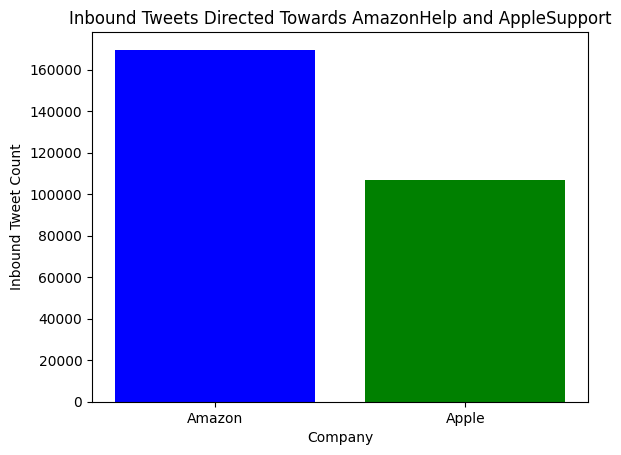

In [31]:
# Filter inbound tweets directed towards AmazonHelp and AppleSupport
amazon_inbound_tweets = apple_inbound_tweets = df_no_outliers[df_no_outliers['author_id'] == 'AmazonHelp']
apple_inbound_tweets = df_no_outliers[df_no_outliers['author_id'] == 'AppleSupport']

# Count the number of inbound tweets for Amazon and Apple
amazon_inbound_tweet_count = len(amazon_inbound_tweets)
apple_inbound_tweet_count = len(apple_inbound_tweets)

print("Amazon Inbound Tweet Count:", amazon_inbound_tweet_count)
print("Apple Inbound Tweet Count:", apple_inbound_tweet_count)

companies = ['Amazon', 'Apple']
counts = [amazon_inbound_tweet_count, apple_inbound_tweet_count]

plt.bar(companies, counts, color=['blue', 'green'])
plt.xlabel('Company')
plt.ylabel('Inbound Tweet Count')
plt.title('Inbound Tweets Directed Towards AmazonHelp and AppleSupport')
plt.show()

<div style="background-color: #e6ffe6; padding: 10px;">
Amazon Inbound Tweet Count: 169576
Apple Inbound Tweet Count: 106804
There are also more inbound tweets from Amazon than Apple. 
</div>

<span style="font-family: Arial; font-weight: bold;"> Customer Service Quality Analysis </span>

In [32]:
# Define keywords indicating satisfaction or dissatisfaction
satisfaction_keywords = ['happy', 'satisfied', 'great', 'awesome', 'excellent', 'good']
dissatisfaction_keywords = ['unhappy', 'unsatisfied', 'bad', 'terrible', 'poor', 'awful']

# Filter tweets mentioning Amazon and containing satisfaction keywords
amazon_satisfied_tweets = df[(df['text_wo_numbers'].str.contains('Amazon', case=False)) & 
                              (df['text_wo_numbers'].str.contains('|'.join(satisfaction_keywords), case=False))]

# Filter tweets mentioning Amazon and containing dissatisfaction keywords
amazon_dissatisfied_tweets = df[(df['text_wo_numbers'].str.contains('Amazon', case=False)) & 
                                (df['text_wo_numbers'].str.contains('|'.join(dissatisfaction_keywords), case=False))]

# Filter tweets mentioning Apple and containing satisfaction keywords
apple_satisfied_tweets = df[(df['text_wo_numbers'].str.contains('Apple', case=False)) & 
                            (df['text_wo_numbers'].str.contains('|'.join(satisfaction_keywords), case=False))]

# Filter tweets mentioning Apple and containing dissatisfaction keywords
apple_dissatisfied_tweets = df[(df['text_wo_numbers'].str.contains('Apple', case=False)) & 
                                (df['text_wo_numbers'].str.contains('|'.join(dissatisfaction_keywords), case=False))]

# Count the number of tweets containing satisfaction and dissatisfaction keywords for Amazon and Apple
amazon_satisfied_count = len(amazon_satisfied_tweets)
amazon_dissatisfied_count = len(amazon_dissatisfied_tweets)
apple_satisfied_count = len(apple_satisfied_tweets)
apple_dissatisfied_count = len(apple_dissatisfied_tweets)

print("Amazon Satisfied Tweets Count:", amazon_satisfied_count)
print("Amazon Dissatisfied Tweets Count:", amazon_dissatisfied_count)
print("Apple Satisfied Tweets Count:", apple_satisfied_count)
print("Apple Dissatisfied Tweets Count:", apple_dissatisfied_count)


Amazon Satisfied Tweets Count: 4762
Amazon Dissatisfied Tweets Count: 3104
Apple Satisfied Tweets Count: 2954
Apple Dissatisfied Tweets Count: 1981


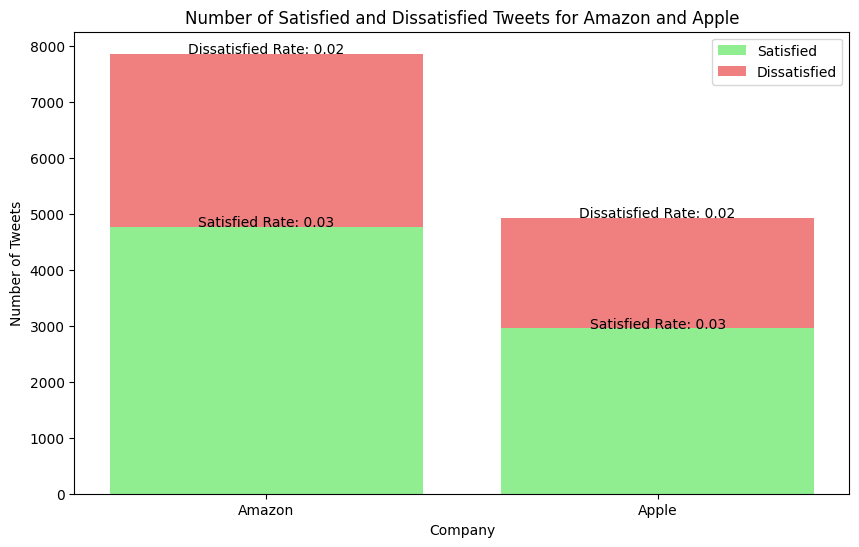

In [33]:
# Define data
companies = ['Amazon', 'Apple']
satisfied_counts = [amazon_satisfied_count, apple_satisfied_count]
dissatisfied_counts = [amazon_dissatisfied_count, apple_dissatisfied_count]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(companies, satisfied_counts, color='lightgreen', label='Satisfied')
plt.bar(companies, dissatisfied_counts, bottom=satisfied_counts, color='lightcoral', label='Dissatisfied')
plt.xlabel('Company')
plt.ylabel('Number of Tweets')
plt.title('Number of Satisfied and Dissatisfied Tweets for Amazon and Apple')
plt.legend()

# Add satisfaction and dissatisfaction rates as text on the bars
for i, company in enumerate(companies):
    total_tweets = amazon_inbound_tweet_count if company == 'Amazon' else apple_inbound_tweet_count
    satisfied_rate = satisfied_counts[i] / total_tweets
    dissatisfied_rate = dissatisfied_counts[i] / total_tweets
    plt.text(i, satisfied_counts[i] + 10, f'Satisfied Rate: {satisfied_rate:.2f}', ha='center')
    plt.text(i, satisfied_counts[i] + dissatisfied_counts[i] + 10, f'Dissatisfied Rate: {dissatisfied_rate:.2f}', ha='center')

plt.show()


<div style="background-color: #e6ffe6; padding: 10px;">
Overall, Amazon has both more Satisfied and Dissatisfied Tweets, but surprising there rate of customer service is the same. 
</div>

<span style="font-family: Arial; font-size: 25px; font-weight: bold;"> Conclusion</span>

Domain Question: Is there a correlations between tweet volume and factors such as product variety, online presence, and customer service quality for Apple and Amazon? 

Prediction: Yes, Amazon has overall more product variety, online presence, and customer service quality than Apple

Acutal Result: Depends on some factors. In turns of product variety, Apple actually gets more tweets compare to Amazon, but it's true that Amazon has more online presence compare to Apple. With Customer Service Quality, both company has the same rating but Amazon has gets twice as much tweets compare to Apple.  

<span style="font-family: Arial; font-weight: bold"> Challenge: </span>

The result may no longer represent the today's world that we live in, time been one of the issue, the other issue has to do with the platform, twitter. At the last 3 months of 2017, twitter suspended about 58 millions user accounts, so we aren't too sure about the trustworthyness about the feedback from customers. And customer qualities analyzed on twitter may not truely represent their real quality since both Amazon and Apple have their on customer service support on their website. 

However, we can still take away something from this data analysis and that is companies with a strong online presence tend to have more engagement and visibility on social media. This underscores the importance of maintaining active and responsive social media profiles for businesses to interact with their customers effectively.